## ლექცია 12: რეგრესია
ერთ-ცვლადიანი რეგრესია;
მრავალ-ცვლადიანი რეგრესია; 
პოლინომიალური  რეგრესია;


# ერთ-ცვლადიანი რეგრესია

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset and Extracting the Independent and Dependent variables
salary = pd.read_csv('Salary_Data.csv')
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [23]:
X = salary.iloc[:, :-1].values
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [24]:
X = salary.iloc[:, :-1].values
y = salary.iloc[:, 1].values
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

<Axes: >

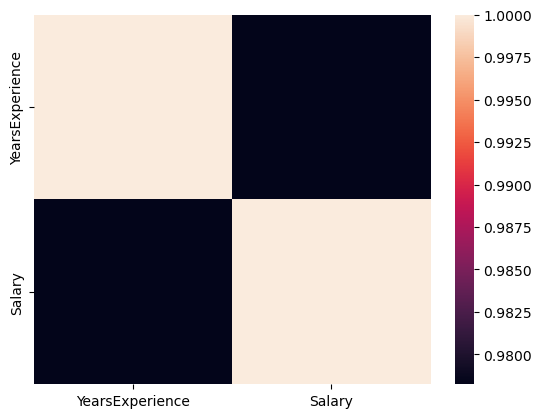

In [14]:
sns.heatmap(salary.corr())

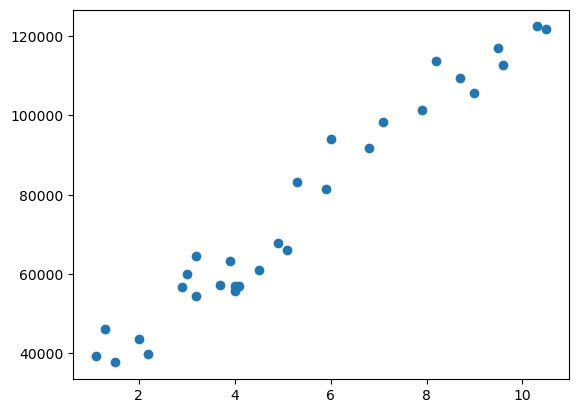

In [25]:
plt.scatter(X, y)

In [16]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [27]:
y_train

array([112635.,  55794.,  83088., 101302.,  56642.,  66029.,  64445.,
        61111., 113812.,  91738.,  46205., 121872.,  60150.,  39891.,
        81363.,  93940.,  57189.,  54445., 105582.,  43525.,  39343.,
        98273.,  67938.,  56957.])

In [28]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)



LinearRegression()

In [32]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [33]:
# Calculating the Coefficients
print(regressor.coef_)
m = regressor.coef_[0]
m

[9312.57512673]


9312.575126729187

In [34]:
# Calculating the Intercept
print(regressor.intercept_)
c = regressor.intercept_

26780.099150628186


In [36]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.988169515729126

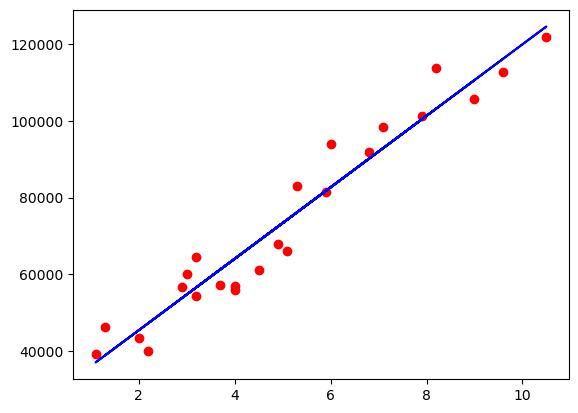

In [37]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

# მრავალ-ცვლადიანი რეგრესია

In [38]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [40]:
# Importing the dataset and Extracting the Independent and Dependent variables
companies = pd.read_csv('1000_Companies.csv')
companies

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [41]:
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

C:\Users\student\AppData\Local\Temp\ipykernel_7084\1370354270.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(companies.corr())


<Axes: >

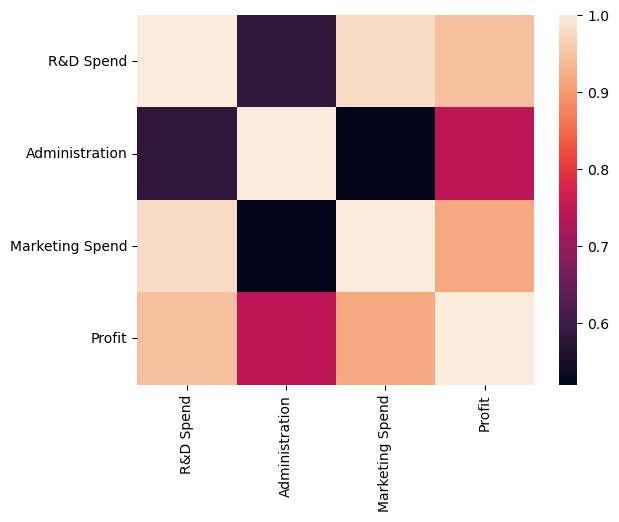

In [42]:
# Data Visualisation
# Building the Correlation matrix
sns.heatmap(companies.corr())

In [43]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X
# onehotencoder = OneHotEncoder(categories = [3])

# X = onehotencoder.fit_transform(X).toarray()

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       ...,
       [100275.47, 241926.31, 227142.82, 0],
       [128456.23, 321652.14, 281692.32, 0],
       [161181.72, 270939.86, 295442.17, 2]], dtype=object)

In [37]:
X

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       ...,
       [100275.47, 241926.31, 227142.82, 0],
       [128456.23, 321652.14, 281692.32, 0],
       [161181.72, 270939.86, 295442.17, 2]], dtype=object)

In [38]:
# X[:, 1:]

array([[136897.8, 471784.1, 2],
       [151377.59, 443898.53, 0],
       [101145.55, 407934.54, 1],
       ...,
       [241926.31, 227142.82, 0],
       [321652.14, 281692.32, 0],
       [270939.86, 295442.17, 2]], dtype=object)

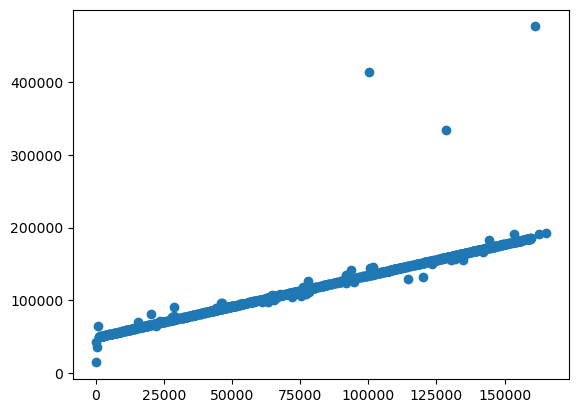

In [49]:
plt.scatter(X[:,0], y)

In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [46]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 89624.88499983,  88261.44060358,  94728.57723845, 176034.49990954,
        83234.84214495, 110393.04058199, 131831.18880607,  91307.52461765,
       164414.26754671,  53585.35570743,  66786.11950078, 150921.89704628,
       126746.78121459,  59174.341725  , 177341.80724482,  75139.98127599,
       118605.9491146 , 164403.24374731, 171336.34862472, 181885.06087421,
       118762.26624784,  85504.5201526 , 181345.84072646,  83979.76201107,
       104839.00200137, 101067.00608604,  53722.31401539,  56706.45386115,
        68732.18107141, 209811.34272095, 121136.34391499, 111557.54775873,
       101309.70393418, 138315.39958078,  63806.10546728, 108690.79660343,
       185830.38310114, 171796.58186122, 174997.97325294, 118029.33822338,
        96553.52264734, 165281.03076793, 107557.31012676,  50557.29080259,
       116871.82636073,  58469.02312669, 158771.35516035,  78902.17488961,
       160082.45834529, 131494.74562654, 185233.67354483, 174962.79318566,
        93579.64586335,  

In [47]:
# Calculating the Coefficients
print(regressor.coef_)

[ 5.27572958e-01  8.44490415e-01  1.06639226e-01 -3.54869857e+02]


In [48]:
# Calculating the Intercept
print(regressor.intercept_)

-51144.726425721834


In [49]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112595959622046

# პოლინომიალური რეგრესია

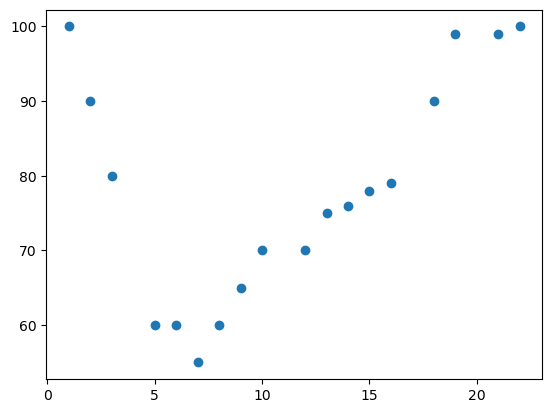

In [50]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()

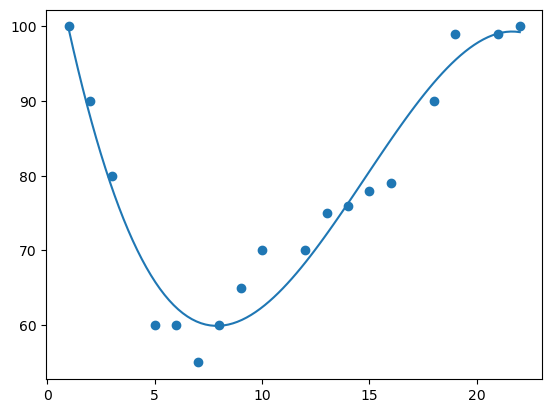

In [125]:
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()